In [1]:
import networkx as nx
from functools import reduce

In [2]:
with open('data/input_12.txt') as fh:
    inp = fh.read().strip()

In [3]:
def parse(line):
    start, ends = line.split(' <-> ')
    ends = [int(x) for x in ends.split(', ')]
    #print(line, '!', start, ends)
    return {start: ends}

inp = reduce(lambda x,y: dict(x, **y), map(parse, inp.split('\n')))

In [4]:
G = nx.Graph()
for node in inp:
    for edge_to in inp[node]:
        G.add_edge(int(node), int(edge_to))

In [5]:
largest_cc = max(nx.connected_components(G), key=len)

In [22]:
# part 1
print(len(nx.node_connected_component(G, 0)))

378


In [23]:
# part 2
print(nx.number_connected_components(G))

204


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
pg = G.copy()
for comp in nx.connected_components(G):
    if len(comp) == 1:
        pg.remove_node(comp.pop())

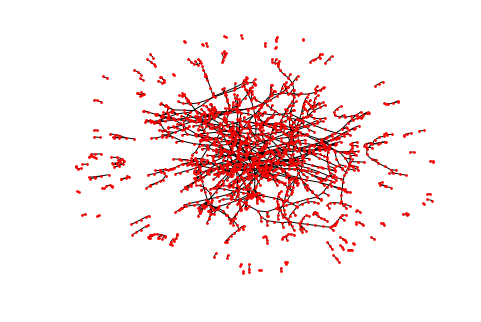

In [30]:
nx.draw(pg, with_labels=False, node_size=3)

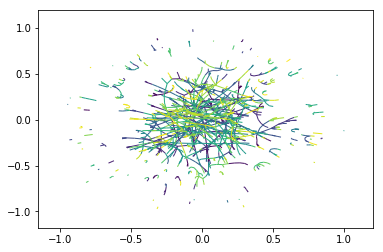

In [50]:
n = pg.number_of_edges()
nx.draw_networkx_edges(pg, pos=nx.spring_layout(pg), edge_color=[x * 1./n for x in range(0, n)])